# Movie Dataset (Exploratory Data Analysis and Modelling)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import matplotlib.pyplot as plt
import os

# Reading Data

In [109]:
movies_df = pd.read_csv("./tmdb_5000_movies.csv")
credits_df = pd.read_csv("./tmdb_5000_credits.csv")

# **Exploratory Data Analysis**

Finding out :
1. the number of rows and columns
2. the data types for each column
3. the names for each column
4. what modifications need to be made in order to make the dataset easier to work with

In [110]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [111]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [112]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [113]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
movies_df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [11]:
movies_df.duplicated().sum()

0

I created separate columns where the entries for columns: "genres", "company_list", "countries_list", "keyword_list", and "release_date" to convert them to dictionary.

In [114]:
import ast
movies_df2 = movies_df
movies_df2['genre_list'] = movies_df['genres'].map(ast.literal_eval)
movies_df2['company_list'] = movies_df['production_companies'].map(ast.literal_eval)
movies_df2['countries_list'] = movies_df['production_countries'].map(ast.literal_eval)
movies_df2['keyword_list'] = movies_df['keywords'].map(ast.literal_eval)
movies_df2['release_date'] = pd.to_datetime(movies_df2['release_date'])

movies_df2 = movies_df2.drop(columns=['keywords', 'genres','homepage','original_language', 'original_title', 'overview', 'spoken_languages', 'status', 'tagline', 'production_countries', 'production_companies'])
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':..."
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na..."
2,245000000,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name..."
3,250000000,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,..."
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':..."


In [115]:
movies_df2['Year_of_Release'] = movies_df2['release_date'].dt.year
movies_df2['Month_of_Release'] = movies_df2['release_date'].dt.month
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0
2,245000000,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0
3,250000000,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0


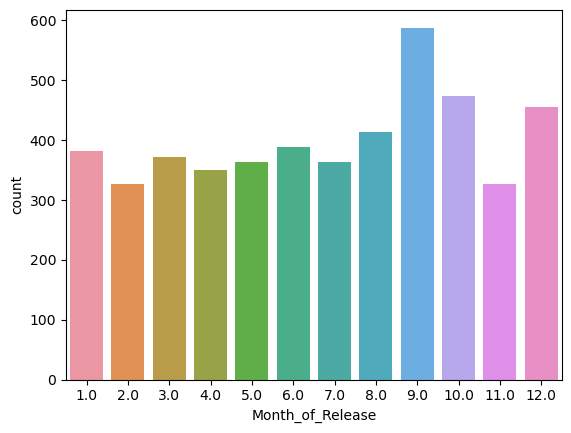

In [116]:
month_stats = pd.DataFrame(movies_df2['Month_of_Release'].value_counts()).sort_index().reset_index()
month_stats = month_stats.rename(columns = {'index':'Month_of_Release', 'Month_of_Release':'count'})
sns.barplot(data = month_stats, x = month_stats['Month_of_Release'], y = month_stats['count'])
plt.show()

After sorting the number of movies released by their month, it looks like the top 3 months for movie releases occur on September, October, and then December. December makes sense, but September and October are surprising to me.

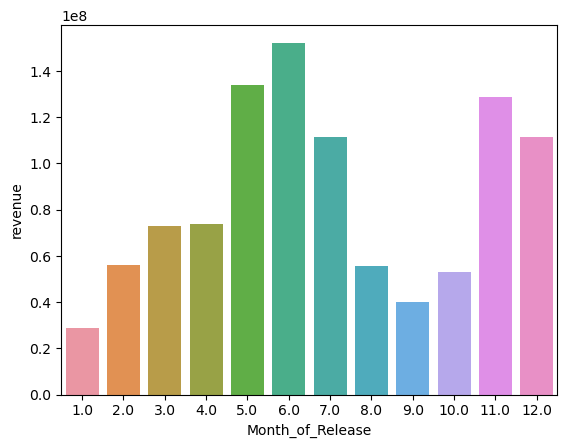

In [24]:
revenue_by_month = pd.DataFrame(movies_df2['revenue'].groupby(movies_df2['Month_of_Release']).mean()).sort_index().reset_index()
revenue_by_month.head()
sns.barplot(data = month_stats, x = revenue_by_month['Month_of_Release'], y = revenue_by_month['revenue'])
plt.show()

However, when taking a look at the average revenue for all of the movies by month of release, the months of May, June, July and then November and December do follow that pattern. In that case, the peak average revenue occurs both in the summer months and in November and December as the holidays start to take place.

In [123]:
year_stats = pd.DataFrame(movies_df2['Year_of_Release'].value_counts()).sort_index().reset_index()
print("First Year: " + str(int(movies_df2['Year_of_Release'].min())) + ": " + str(year_stats['Year_of_Release'].min()))
print("Last Year: " + str(int(movies_df2['Year_of_Release'].max())) + ": " + str(year_stats['Year_of_Release'].max()))

First Year: 1916: 1
Last Year: 2017: 247


Interestingly, the first year recorded in the dataset is 1916 and the last recorded year is 2017. This means there is 101 years of movie data stored in the database, which may make doing analysis by year of release tricky since the timeframe is so large.

Below, I'm going to separate the dataset into two groups: Pre-2000 and Post-2000. This way, instead of working with each individual year of release, I can just work with the century which may make the data easier to work with for any future modelling.

In [124]:
# Classify year of release as Before 2000 or as the year 2000 and after

century = []
for i in range(len(movies_df2)):
    if (movies_df2['Year_of_Release'][i] >= 2000.0):
        century.append('Post-2000')
    else:
        century.append('Pre-2000')
        
movies_df2['Century_of_Release'] = pd.DataFrame(century)
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0,Post-2000
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0,Post-2000
2,245000000,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0,Post-2000
3,250000000,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0,Post-2000
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0,Post-2000


  Century_of_Release       revenue
0          Post-2000  8.768677e+07
1           Pre-2000  6.777715e+07


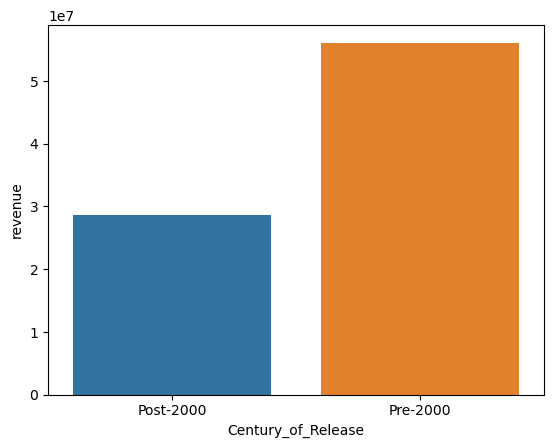

In [125]:
revenue_by_century = pd.DataFrame(movies_df2['revenue'].groupby(movies_df2['Century_of_Release']).mean()).sort_index().reset_index()
print(revenue_by_century.head())
sns.barplot(data = month_stats, x = revenue_by_century['Century_of_Release'], y = revenue_by_month['revenue'])
plt.show()

       index  Century_of_Release
0  Post-2000                3494
1   Pre-2000                1309


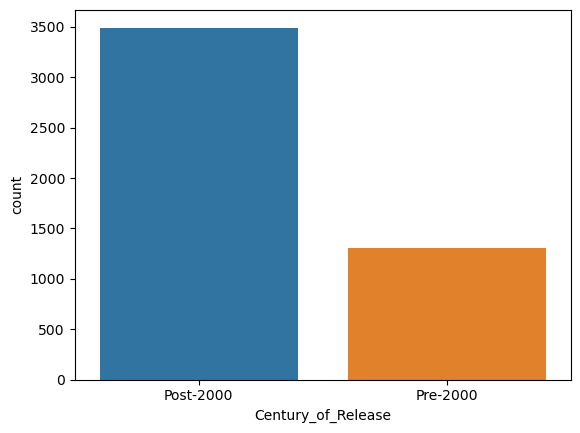

In [127]:
release_century = pd.DataFrame(movies_df2['Century_of_Release'].value_counts()).sort_index().reset_index()
print(release_century.head())
release_century = release_century.rename(columns = {'index':'Century_of_Release', 'Century_of_Release':'count'})

sns.barplot(data = release_century, x = release_century['Century_of_Release'], y = release_century['count'])
plt.show()

Continuing to examine the movies by century of release, the dataset seems to be populated overwhelmingly by movies released at the year 2000 and over. This may help to explain why the revenue is higher for the years greater than or equal to 2000. However, it is interesting to note that despite having fewer films released pre-2000, the average revenue is around 20 million less than movies released at or post-2000.

The code below was used to help determine the contents for the dictionary objects in the dataset. However, I opted not to use it so the code doesn't have any effect on future EDA or code.

In [30]:

import ast
import random

def get_dict_elem(column):
    test = []
    for i in range(len(movies_df2[column])):
        if(len(movies_df2[column].iloc[i]) > 0):
            inner_dict = {}
            for j in range(len(movies_df2[column].iloc[i])):
                test.append(str(movies_df2[column][i][j]['name']))
        else:
            test.append(str("Null"))
    return test        

result = get_dict_elem('countries_list')
df_test = pd.DataFrame(result)
df_test.head()
df_test.value_counts()

United States of America    3956
United Kingdom               636
Germany                      324
France                       306
Canada                       261
                            ... 
Lebanon                        1
Lithuania                      1
Monaco                         1
Nigeria                        1
Afghanistan                    1
Length: 89, dtype: int64

From here, I had some trouble deciding the best method for storing the genre names for each movie, since each movie has been classified into multiple genres. I thought about just taking the first entry in each genre dictionary, however this might not yield a representative dataset. Therefore, I thought it best to try to find a way to include all the genres for each movie, and then determine a way to filter the dataset by genre.

In [31]:
genres = {
    18 : 'Drama', 35 : 'Comedy', 28 : 'Action', 12 : 'Adventure',
    27 : 'Horror', 80 : 'Crime', 53 : 'Thriller', 16 : 'Animation',
    14 : 'Fantasy', 10749 : 'Romance', 878 : 'Science Fiction', 99 : 'Documentary',
    10751 : 'Family', 9648 : 'Mystery', 10402 : 'Music', 37 : 'Western',
    36 : 'History', 10752 : 'War', 10770 : 'TV Movie', 10769 : 'Foreign'
}

genre_ids = list(genres.keys())
genre_names = list(genres.values())

## Get IDs of Movies depending on Genre
def get_genre(name):
    id_test = []
    for i in range(len(movies_df2['genre_list'])):
        for j in range(len(movies_df2['genre_list'].iloc[i])):
            if(movies_df2['genre_list'][i][j]['name'] == name):
                id_test.append(movies_df2['id'][i])
    return id_test

# name = genres[10769]
# movie_ids = get_genre(name)
# print(len(movie_ids))
# print(genre_ids)
# print(genre_names)

In [32]:
genre_totals = {}
for i in range(len(genre_names)):
    name = genre_names[i]
    id_list = get_genre(name)
    count = len(id_list)
    genre_totals[name] = count

In [33]:
genre_counts_df = pd.DataFrame.from_dict(genre_totals, orient='index', columns=['count'])
genre_counts_df = genre_counts_df.sort_values(by='count', ascending=False)
genre_counts_df

,count
Drama,2297
Comedy,1722
Thriller,1274
Action,1154
Romance,894
Adventure,790
Crime,696
Science Fiction,535
Horror,519
Family,513


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Romance'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Science Fiction'),
  Text(8, 0, 'Horror'),
  Text(9, 0, 'Family'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Mystery'),
  Text(12, 0, 'Animation'),
  Text(13, 0, 'History'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Documentary'),
  Text(17, 0, 'Western'),
  Text(18, 0, 'Foreign'),
  Text(19, 0, 'TV Movie')])

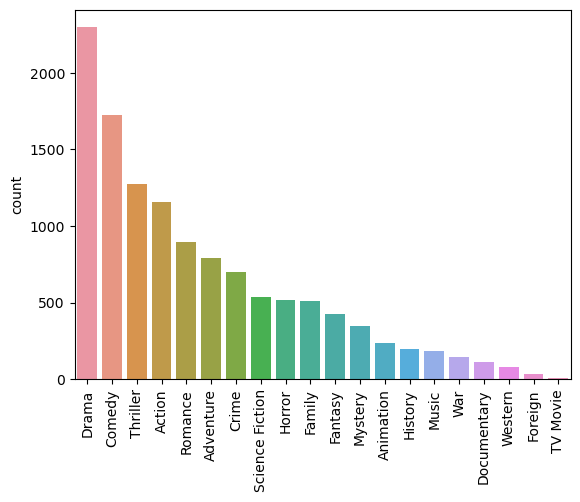

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = genre_counts_df, x = genre_counts_df.index, y = genre_counts_df['count'])
plt.xticks(rotation=90)

According to the barplot, Drama is the genre most represented in the dataset, while TV Movie is the least represented. This may be important in future analyses related to movie genre. For example, it may be difficult to conduct an analysis on genres with little representation in the dataset. Furthermore, performing a comparison between genres may be difficult to accomplish when comparing genres with high representation to genres that have low representation in the dataset.

After having performed a cursory analysis of movies by genre, at this point, I wanted to move on to examining the ratings for each film. To start, I wanted to find a way to visually show the ratings for each movie. Since each movie has a rating and that rating is represented as decimal value, I figured that one way to represent it would be through a barplot. However, this proved difficult to accomplish when each movie has a specific decimal value for a rating. Therefore, I needed to convert the rating data to fall within ranges as opposed to decimal values to make the graphing easier.


In [35]:
## Create a new column in the dataframe that organizes vote averages into vote ranges.
## 0, 0-1, 1-2, 3-4, 4-5, 5-6, 6-7, 7-8, 8-9, 9-10

def sort_ratings(df):
    a = b = c = d = e = f = g = h = m = j = k = l = 0
    rating_list = []

    for i in range(len(df)):
        if(0.0 <= df['vote_average'][i] < 1.0):
            rating_list.append('0-1')
        elif(1.0 <= df['vote_average'][i] < 2.0):
            rating_list.append('1-2')
        elif(2.0 <= df['vote_average'][i] < 3.0):
            rating_list.append('2-3')
        elif(3.0 <= df['vote_average'][i] < 4.0):
            rating_list.append('3-4')
        elif(4.0 <= df['vote_average'][i] < 5.0):
            rating_list.append('4-5')
        elif(5.0 <= df['vote_average'][i] < 6.0):
            rating_list.append('5-6')
        elif(6.0 <= df['vote_average'][i] < 7.0):
            rating_list.append('6-7')
        elif(7.0 <= df['vote_average'][i] < 8.0):
            rating_list.append('7-8')
        elif(8.0 <= df['vote_average'][i] < 9.0):
            rating_list.append('8-9')
        elif(9.0 <= df['vote_average'][i] <= 10.0):
            rating_list.append('9-10')
        else:
            rating_list.append('0-1')
    return rating_list
    
sorted_ratings = sort_ratings(movies_df2)
rating_df = pd.DataFrame(sorted_ratings, columns=['range'])
movies_df2['rating_range'] = rating_df


In [36]:
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release,rating_range
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0,Post-2000,7-8
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0,Post-2000,6-7
2,245000000,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0,Post-2000,6-7
3,250000000,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0,Post-2000,7-8
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0,Post-2000,6-7


In [136]:
rating_count

,range,count
0,0-1,64
1,1-2,3
2,2-3,21
3,3-4,84
4,4-5,356
5,5-6,1303
6,6-7,1984
7,7-8,903
8,8-9,79
9,9-10,6


Text(0.5, 0, 'range')

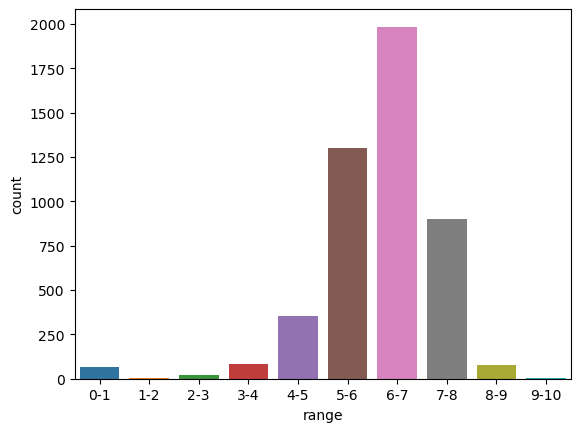

In [137]:
count = rating_df.value_counts()
rating_count = pd.DataFrame(count).sort_index().reset_index()
rating_count = rating_count.rename(columns = {rating_count.columns[1]:'count'})
sns.barplot(data = rating_count, x = rating_count['range'], y = rating_count['count'])
plt.xlabel('range')

Above, the barplot shows the number of movies in each rating range. According to the dataset the range of 6-7 has the largest number of movies in it, followed by 5-6 and then 7-8. This shows that a majority of the movies in the dataset fall between the ratings of 5 and 8. This is important to keep in mind since it seems like the dataset is dispraportionately represented by movies within the range of 5 and 8.

Interestingly enough, the plot follows a normal distribution, skewed slightly to the right.

One thing to note, however, is that some of the average ratings in the original dataset are averaged from only a few ratings. It may be best to filter out movies in the dataset that only have a few ratings. This is because this may skew any analyses related to ratings. For example, a movie with only 5 user ratings, but rated highly, may be rated higher on average than a movie with 100 ratings.

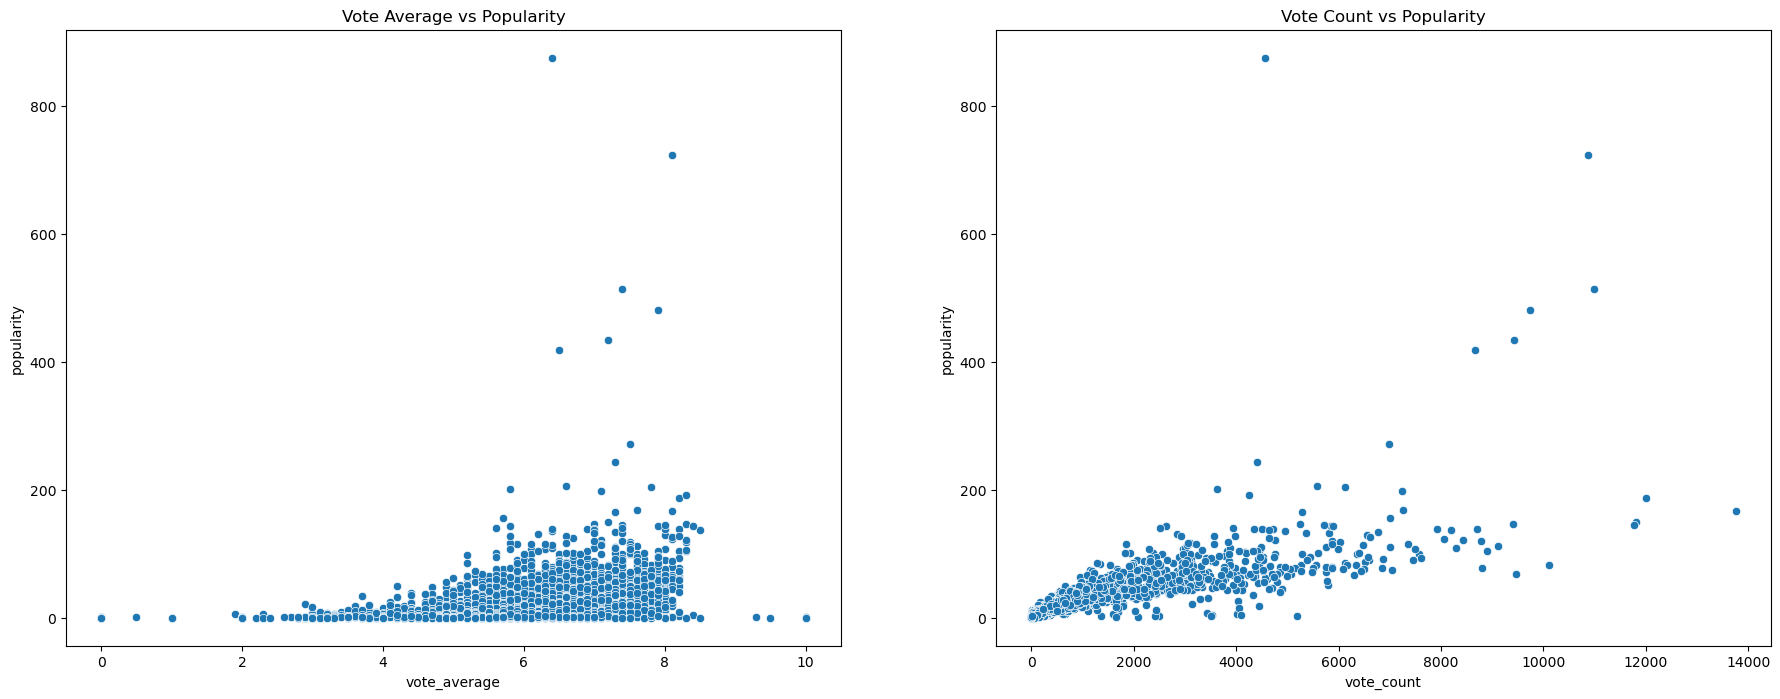

In [38]:
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.scatterplot(data=movies_df2, x=movies_df2['vote_average'], y=movies_df2['popularity'], ax=ax[0])
sns.scatterplot(data=movies_df2, x=movies_df2['vote_count'], y=movies_df2['popularity'], ax=ax[1])

ax[0].set_title('Vote Average vs Popularity')
ax[1].set_title('Vote Count vs Popularity')

plt.show()

According to TMDB, where this dataset was sourced, "popularity" is a score impacted by several attributes such as number of votes, number of views, users who favorited the movie or put it on their watchlist, etc.. 

Interestingly, when comparing popularity with the vote average, the plot shows that the majority of averages have a popularity of below 200. So according to the plot, movies that have a high popularity score don't necessarily have a high average score for votes.

Furthermore, when comparing the number of votes with the popularity, most of the vote counts are clustered around the 0-4000 mark. There does however, seem to be a pattern where as the vote_count increases there also seems to be a slight increase in popularity, suggesting a positive correlation between the two. This relationship may deserve more attention in future analyses.

Another interesting thing to note from the plots above are the dots that are far apart from where the data is mostly clustered, suggesting the existance of outliers.

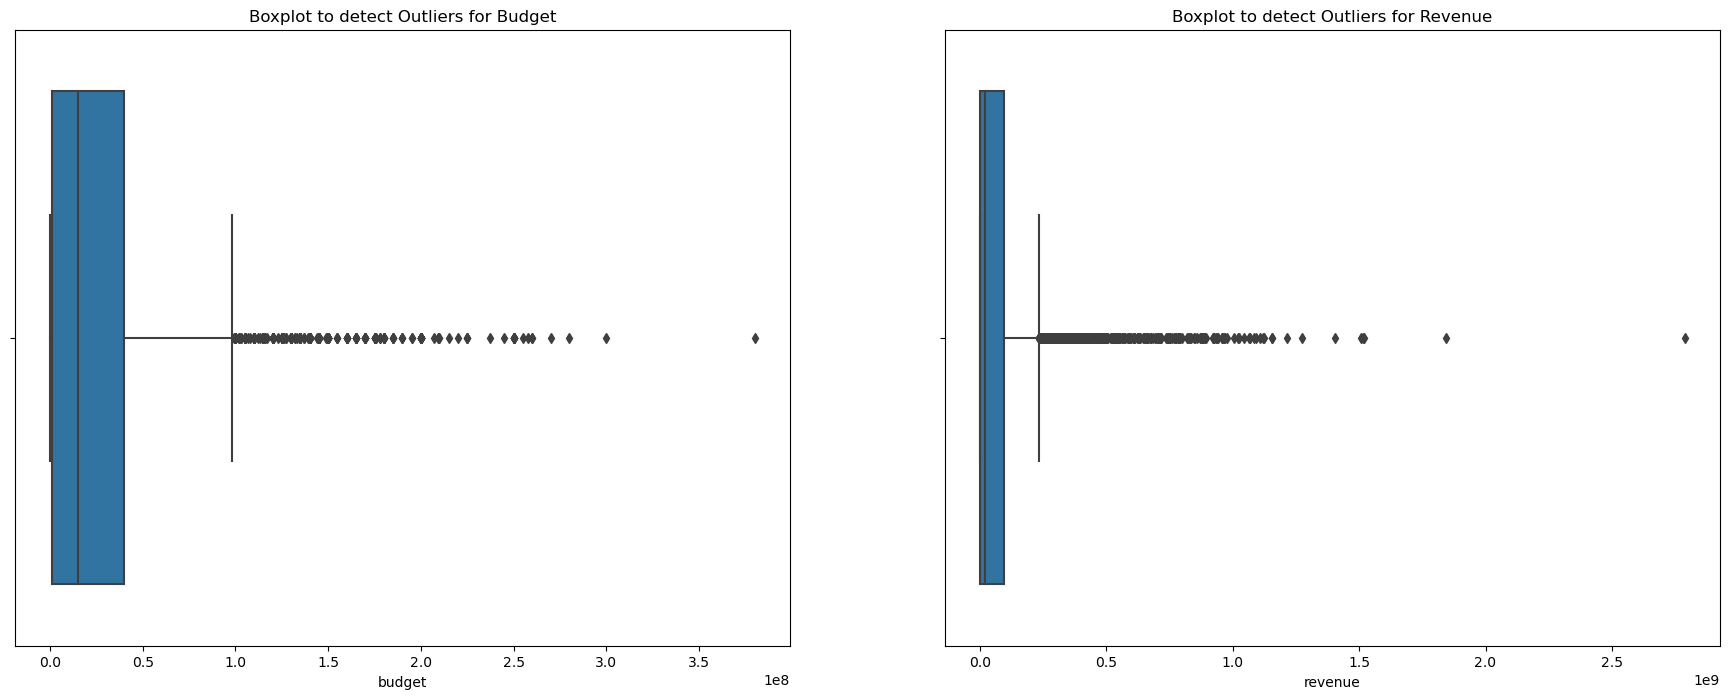

In [39]:
fig, ax = plt.subplots(1,2,figsize=(22,8))

sns.boxplot(x=movies_df2['budget'], ax=ax[0])
sns.boxplot(x=movies_df2['revenue'], ax=ax[1])

ax[0].set_title('Boxplot to detect Outliers for Budget')
ax[1].set_title('Boxplot to detect Outliers for Revenue')

plt.show()

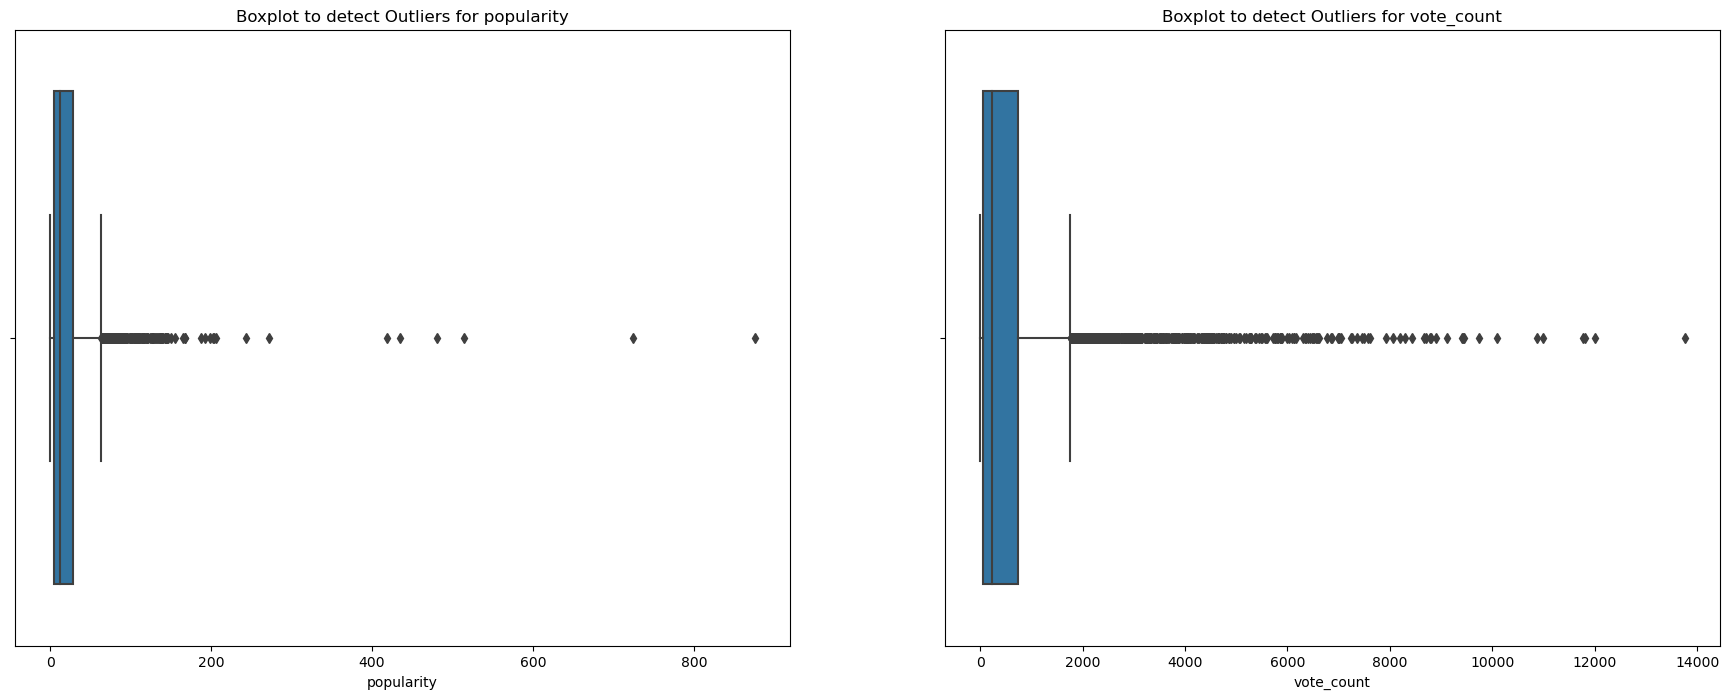

In [40]:
fig, ax = plt.subplots(1,2,figsize=(22,8))

sns.boxplot(x=movies_df2['popularity'], ax=ax[0])
sns.boxplot(x=movies_df2['vote_count'], ax=ax[1])

ax[0].set_title('Boxplot to detect Outliers for popularity')
ax[1].set_title('Boxplot to detect Outliers for vote_count')

plt.show()

The graphs above are to check for outliers. Certain models are more sensitive to outliers than others, so this may be relevent in the future if I decide to build a model with this data.

The original data set has revenue and budget, two metrics that movies are usually measured by in order to determine success. However, there is another metric used to determine whether or not movies are successful or not: profit. Profit can be calculated by subtracting budget from revenue, and once that has been done we can make profit the target variable for classification or prediction.

In [41]:
pairplot_columns = movies_df2
pairplot_columns['profit'] = pairplot_columns['revenue'] - pairplot_columns['budget']
pairplot_columns.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release,rating_range,profit
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0,Post-2000,7-8,2550965087
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0,Post-2000,6-7,661000000
2,245000000,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0,Post-2000,6-7,635674609
3,250000000,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0,Post-2000,7-8,834939099
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0,Post-2000,6-7,24139100


In [42]:
pairplot_columns = pairplot_columns.drop(columns = ['Month_of_Release', 'Year_of_Release', 'Century_of_Release' ,'budget','revenue', 'keyword_list' ,'company_list', 'countries_list', 'title', 'release_date', 'genre_list', 'rating_range', 'id'])
pairplot_columns.head()

,popularity,runtime,vote_average,vote_count,profit
0,150.437577,162.0,7.2,11800,2550965087
1,139.082615,169.0,6.9,4500,661000000
2,107.376788,148.0,6.3,4466,635674609
3,112.312950,165.0,7.6,9106,834939099
4,43.926995,132.0,6.1,2124,24139100


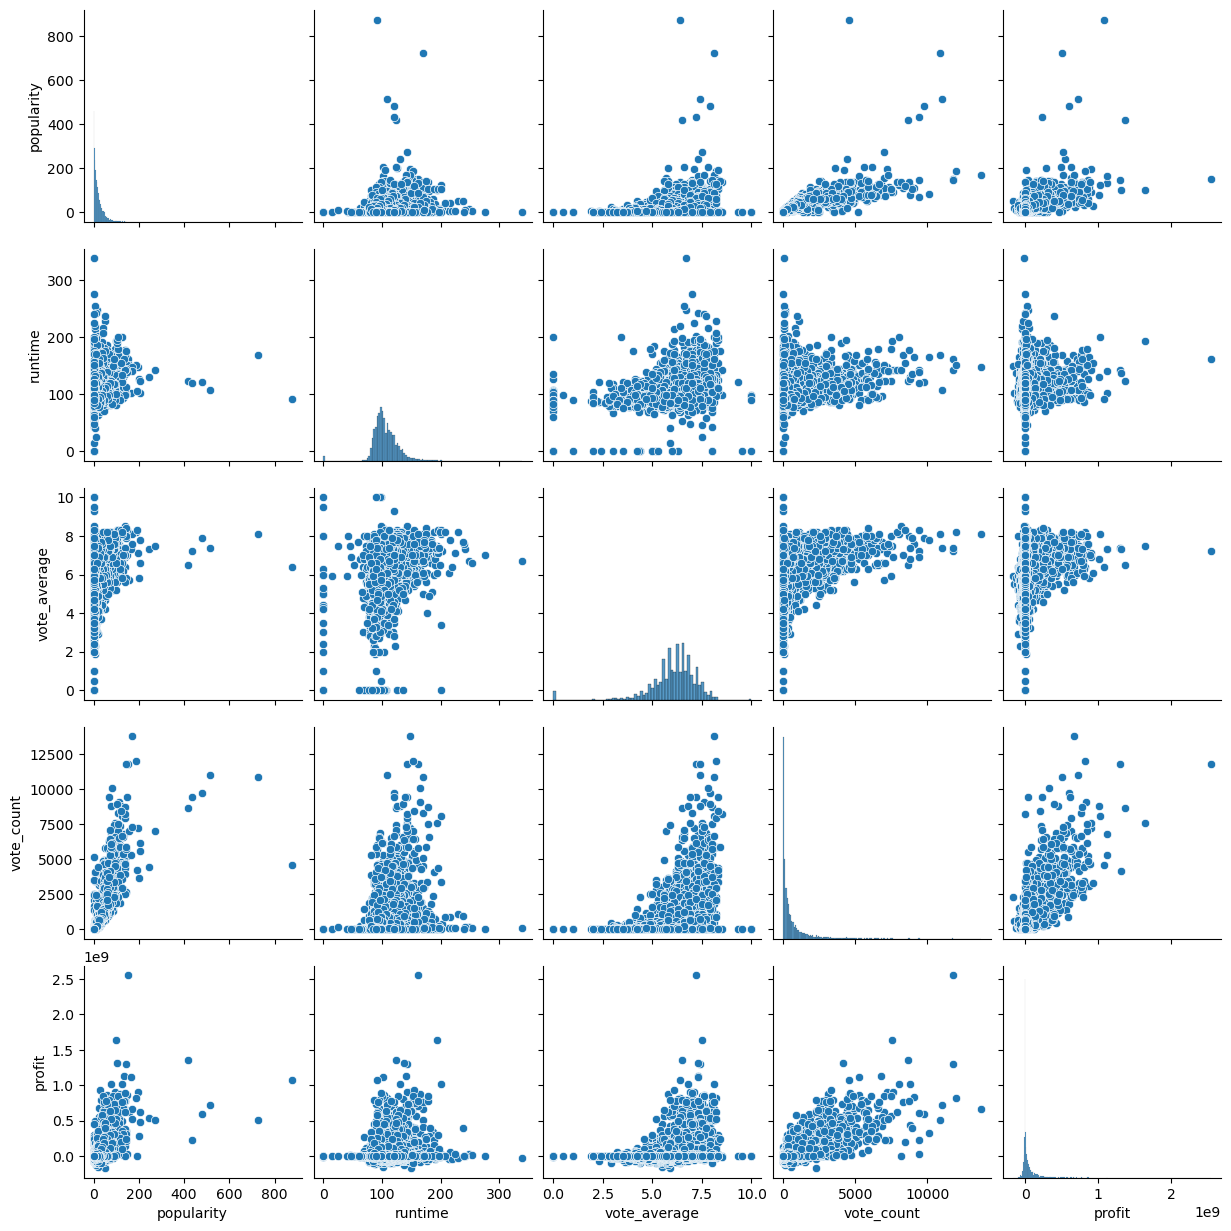

In [43]:
sns.pairplot(pairplot_columns)

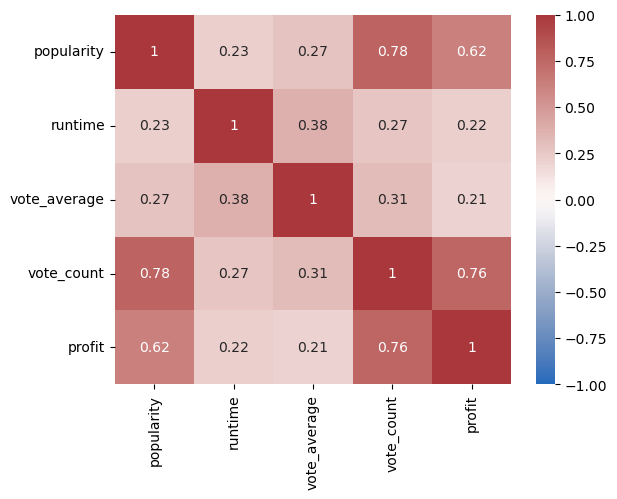

In [44]:
heatmap = sns.heatmap(pairplot_columns.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))

Both the scatterplot matrix and the correlation heatmap were created to check for relationships between variables. In both plots, it seems as if popularity-vote_count, profit-vote_count, and popularity-profit are the pairs of variables that have the strongest correlation to one another. However, there isn't much linearity to the scatter plots when we look at the scatterplot matrix. Looking at this, the lack of linearity may indicate that a linear regression model would be unable to accurately model any of these relationships.

# **EDA Summary**

* Top 3 months for movie releases occur on September, October, and December. With September being the month with the largest total releases.
* The months of May, June, July, and then November and December have the highest average revenue in the dataset.
* The Dataset goes from 1916 as its earliest year to the year 2017.
* Movies released Pre-2000 have the largest mean revenue at around 87.6 million. While movies released post-2000 have less at around 67.7 million.
* Most of the movies in the dataset were released post-2000 at a count of 3494. While movies in the dataset released pre-2000 are only at a count of 1309.
* Drama is the most represented genre in the dataset with around 2297 movies. Comedy is ranked second with 1722. Thriller is ranked third with 1274.
* The least represented movies in the dataset are TV Movies with a count of 8, followed by foreign movies, and then Westerns.
* When organizing the ratings for each movie into specific ranges, the range of 6-7 has the larges number of movies in it, followed by 5-6, and then 7-8.
* From the scatterplot matrix, there seems to be very little linearity between the different pairs of variables.
* From the correlation heatmap: popularity-vote_count, profit-vote_count, and popularity-profit are the pairs of variables that have the strongest correlation to one another

# **Linear Regression**

I understand that these the lack of linearity between any of the variables in the scatterplot matrix means that a linear regression model may fail to accurately show any relationship. However, I thought it would be fun to try, to see the results, and then compare those results to other algorithms to see if there is any improvement.

In order to create the linear regression model, I needed to decide on an independent variable to model with "profit" as the dependent variable. In this case, I chose "popularity" as the independent variable. This is because in both the scatterplot matrix and the correlation heatmap, these two variables have some relationship between one another.

In [45]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_data = pairplot_columns[["profit","vote_average"]]

ols_formula = "profit ~ vote_average"

In [46]:
OLS = ols(formula = ols_formula, data = model_data)
model = OLS.fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sat, 16 Mar 2024   Prob (F-statistic):           3.33e-48
Time:                        12:21:02   Log-Likelihood:                -96658.
No. Observations:                4803   AIC:                         1.933e+05
Df Residuals:                    4801   BIC:                         1.933e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.118e+07   9.97e+06     -9.141      0.000   -1.11e+08   -7.16e+07
vote_average   2.37e+07   1.61e+06     14.752      0.000    2.06e+07    2.69e+07
==============================================================================
Omnibus:                     4916.390   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           418911.811
Skew:                           4.939   Prob(JB):                         0.00
Kurtosis:                      47.673   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Unsurprisingly, the model doesn't work well when trying to predict profit from average movie score. The R-squared value is only 0.043 which means that the regression line only explains 4.3% of the points in the relationship between vote_average and profit. Looking at this, this linear regression plot is clearly not an appropriate model for this data.

# **Logistic Regression**

From here, we're going to move on to a Logistic Regression model. This logistic regression model will try to classify movies that are profitable and unprofitable by first using the "vote_average" independent variable to see how it performs in comparison to the Linear regression model. Afterwards, we'll move on to another Logistic Regression model where we add more independent variables to see if it improves the classification of profitable and unprofitable movies.

In [48]:
#mask = movies_df2['profit'] <= 0
#movies_df2[mask]
movies_df2['budget'] = movies_df2['budget'].astype(float)
movies_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   budget              4803 non-null   float64       
 1   id                  4803 non-null   int64         
 2   popularity          4803 non-null   float64       
 3   release_date        4802 non-null   datetime64[ns]
 4   revenue             4803 non-null   int64         
 5   runtime             4801 non-null   float64       
 6   title               4803 non-null   object        
 7   vote_average        4803 non-null   float64       
 8   vote_count          4803 non-null   int64         
 9   genre_list          4803 non-null   object        
 10  company_list        4803 non-null   object        
 11  countries_list      4803 non-null   object        
 12  keyword_list        4803 non-null   object        
 13  Year_of_Release     4802 non-null   float64     

In order to do this, I need to prepare the data. To accomplish this, I thought to separate the movies in the dataset between what was profitable and unprofitable. Profitable movies have a profit amount greater than zero. Unprofitable movies have a profit amount less than or equal to zero.

In [49]:
profitability = []
for i in range(len(movies_df2)):
    if movies_df2['profit'][i] <= 0:
        profitability.append('unprofitable')
    else:
        profitability.append('profitable')
        
movies_df2['profitability'] = pd.DataFrame(profitability)
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release,rating_range,profit,profitability
0,237000000.0,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0,Post-2000,7-8,2550965087,profitable
1,300000000.0,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0,Post-2000,6-7,661000000,profitable
2,245000000.0,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0,Post-2000,6-7,635674609,profitable
3,250000000.0,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0,Post-2000,7-8,834939099,profitable
4,260000000.0,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0,Post-2000,6-7,24139100,profitable


Once the movies in the dataset have been sorted between profitable and unprofitable, the next step is to one-hot encode these values to be either 0 or 1 for the Logistic Regression model to work.

Also, since the dataset is also divided between Century of Release as well, I can also one-hot encode those entries and include them for Logistic regression.

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

movies_df2['profitability'] = OneHotEncoder(drop='first').fit_transform(movies_df2[['profitability']]).toarray()
movies_df2['Century_of_Release'] = OneHotEncoder(drop='first').fit_transform(movies_df2[['Century_of_Release']]).toarray()
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release,rating_range,profit,profitability
0,237000000.0,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0,0.0,7-8,2550965087,0.0
1,300000000.0,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0,0.0,6-7,661000000,0.0
2,245000000.0,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0,0.0,6-7,635674609,0.0
3,250000000.0,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0,0.0,7-8,834939099,0.0
4,260000000.0,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0,0.0,6-7,24139100,0.0


After one-hot encoding, the entries in both the profitablity column and the Century_of_Release column have been changed to be either 0.0 or 1.0. In this case, profitable movies are encoded as 0.0, and unprofitable movies are encoded as 1.0; and movies post-2000 are coded as 0.0, while movies pre-2000 are coded as 1.0

[[-0.64388054]]
[3.78230552]


<Axes: xlabel='vote_average', ylabel='profitability'>

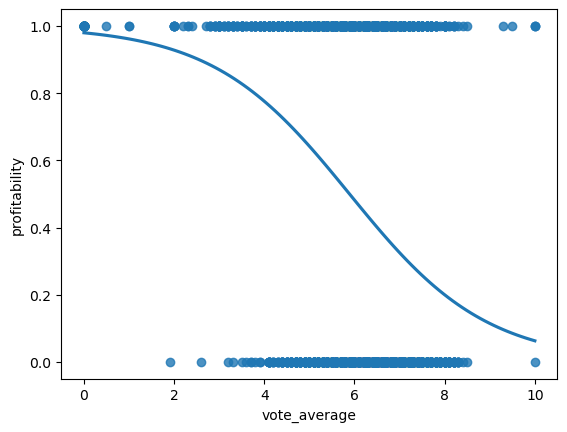

In [51]:
x = movies_df2[['vote_average']]
y = movies_df2['profitability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
clf = LogisticRegression().fit(x_train, y_train)

print(clf.coef_)
print(clf.intercept_)

sns.regplot(x='vote_average', y='profitability',data=movies_df2,logistic=True,ci=None)

Above, the data is split into training and testing data. Then the training data is given to the model, and a regression plot is created to visualize the model's results.

Interestingly enough, the model does seem to create an appropriate S-Curve. Looking at this, one can reasonably assume that the use of vote_average as an independent variable is useful for classifying profitable and unprofitable movies. In this case, with 0.0 representing profitable movies, and 1.0 representing unprofitable movies. It is clear that the higher the vote_average score, the more profitable the movie is. However, further examination of the model is needed to see how well it's performing.

In [52]:
y_pred = clf.predict(x_test)
clf.predict_proba(x_test)

array([[0.53627758, 0.46372242],
       [0.62987815, 0.37012185],
       [0.62987815, 0.37012185],
       ...,
       [0.52023337, 0.47976663],
       [0.62987815, 0.37012185],
       [0.33365969, 0.66634031]])

In [53]:
log1_acc = metrics.accuracy_score(y_test, y_pred)
log1_prec = metrics.precision_score(y_test, y_pred)
log1_recall = metrics.recall_score(y_test, y_pred)
log1_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", "%.6f" % log1_acc)
print("Precision:", "%.6f" % log1_prec)
print("Recall:", "%.6f" % log1_recall)
print("F1 Score:", "%.6f" % log1_f1)

Accuracy: 0.614488
Precision: 0.614251
Recall: 0.449640
F1 Score: 0.519211


The scores above are metrics for evaluating the performance of the Logistic Regression model.

Accuracy measures the proportion of data points correctly categorized. Precision measures the proportion of positive predictions that were actually true positives. Recall measures the proportion of positives that the model correctly identified. While F1 score combines both precision and recall into a single score.

61% of the proportion of data points were correctly categorized, and only 61% of the predicted positive data points were actually true positives. Furthermore, a recall score of 44.9% means that only 44.9% of the proportion of positives were correctly identified as positives. From this, one could conclude that the Logistic Regression model scores low when it comes to classifying Profitable and Unprofitable movies.

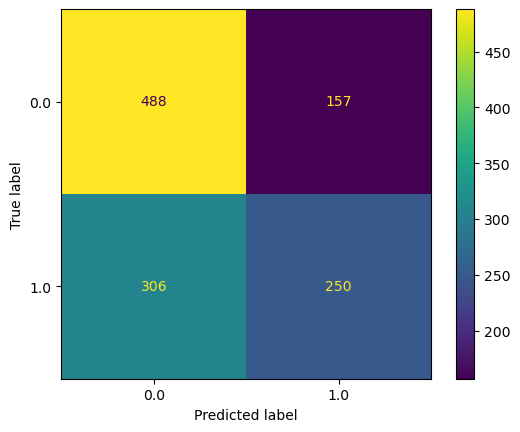

In [54]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

Above, a confusion matrix was created to measure the amount of True Positives, True Negatives, False positives, and False Negatives. According to the matrix, there are 306 False Negatives and 157 False Positives.

In this case, 1.0 represents unprofitable movies while 0.0 represents profitable movies. Therefore, according to the confusion matrix, the model is predicting 306 datapoints as profitable while they are actually unprofitable. This unfortunately points to an unreliable model for this particular classification task, and further work needs to be done in order to ensure an accurate model.

AUC Score: 0.6031147175283028


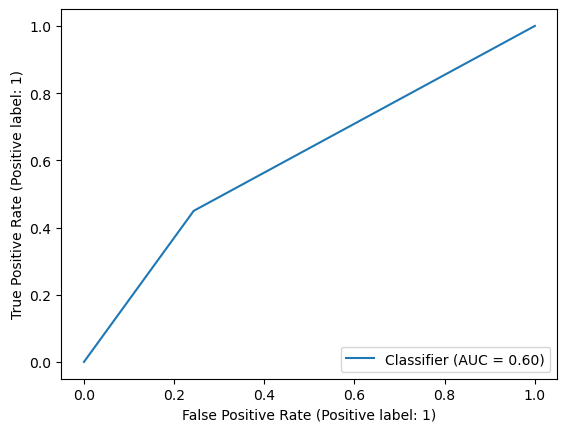

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

log1_auc = metrics.roc_auc_score(y_test,y_pred)

print("AUC Score: " + str(log1_auc))

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

According to the ROC Curve, while the false positive rate is low, the rate of true positives is also quite low, with the AUC curve sitting at a score of only 0.6. This shows that, despite the acceptable metrics regarding accuracy, precision, and recall; the model still has a low true positive rate.

Ideally, the true positive rate will be high while the false positive rate is low. So in an ideal situation, the bend in the AUC curve would be as close to the top-left of the graph as possible.

# **Improved Logistic Regression**

Here, I am going to try and improve the Logistic Regression model by adding more independent variables. In this case, I am going to include 'popularity', 'runtime', 'vote_average', 'vote_count', 'Month_of_Release', and 'Year_of_Release' as independent variables to see whether or not it improves the classification of profitable and unprofitable movies.

In [56]:
count = sort_ratings(movies_df2)
df = pd.DataFrame(count)
print(df.value_counts())
df.head()

6-7     1984
5-6     1303
7-8      903
4-5      356
3-4       84
8-9       79
0-1       64
2-3       21
9-10       6
1-2        3
dtype: int64


,0
0,7-8
1,6-7
2,6-7
3,7-8
4,6-7


In [57]:
df_logreg = movies_df2[['popularity','runtime','vote_average','vote_count','profitability', 'Month_of_Release', 'Year_of_Release']]
df_logreg = df_logreg.dropna()
df_logreg.isna().sum()

popularity          0
runtime             0
vote_average        0
vote_count          0
profitability       0
Month_of_Release    0
Year_of_Release     0
dtype: int64

[[-0.0674763   0.00105749 -0.31164819 -0.00156048 -0.02368529  0.00169341]]
[-0.00327789]


<Axes: xlabel='vote_average', ylabel='profitability'>

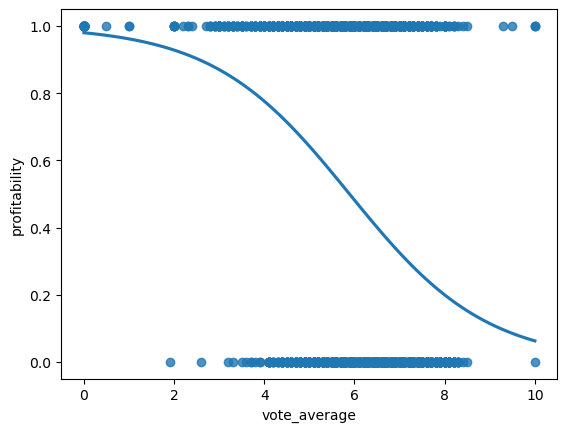

In [58]:
y = df_logreg['profitability']
x = df_logreg.drop('profitability', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=500).fit(x_train, y_train)

print(clf.coef_)
print(clf.intercept_)

sns.regplot(x='vote_average', y='profitability',data=df_logreg, logistic=True, ci=None)

In [59]:
y_pred = clf.predict(x_test)
clf.predict_proba(x_test)

array([[9.99974240e-01, 2.57600992e-05],
       [4.65045364e-01, 5.34954636e-01],
       [3.18910757e-01, 6.81089243e-01],
       ...,
       [1.27974963e-01, 8.72025037e-01],
       [5.99410164e-01, 4.00589836e-01],
       [2.92795849e-01, 7.07204151e-01]])

In [60]:
log2_acc = metrics.accuracy_score(y_test, y_pred)
log2_prec = metrics.precision_score(y_test, y_pred)
log2_recall = metrics.recall_score(y_test, y_pred)
log2_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", "%.6f" % log2_acc)
print("Precision:", "%.6f" % log2_prec)
print("Recall:", "%.6f" % log2_recall)
print("F1 Score:", "%.6f" % log2_f1)

Accuracy: 0.777083
Precision: 0.725361
Recall: 0.831325
F1 Score: 0.774737


In the previous Logistic Regression model we had scores of 61% for accuracy, 61% for precision, and 44.9% for recall.

Here though, we do see a general improvement. Accuracy has increased to a score of 77.7%, while precision has increased to 72.5%. The biggest jump in improvement is with recall. Recall seemed to have doubled its score from 44.9% to 83.1%.

From this, one can conclude that the inclusion of more independent variables has led to the overall improvement of the model's ability to perform classification for profitable and unprofitable movies. 

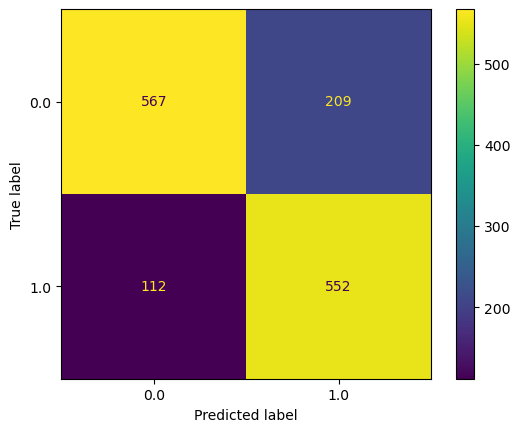

In [61]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

According to the confusion matrix, the number of data points predicted to be profitable but are actually unprofitable, has significantly decreased from 306 to 112. Furthermore, the data points correctly predicted to be unprofitable has increased to 552 from 250. The only downside is the increase in data points predicted to be unprofitable but were actually profitable from 157 to 209. So while there is clearly a general improvement to this model in comparison to the precious one, there is still a point of inaccuracy in the model's ability to classify profitable and unprofitable movies.

AUC Score: 0.7809977021488015


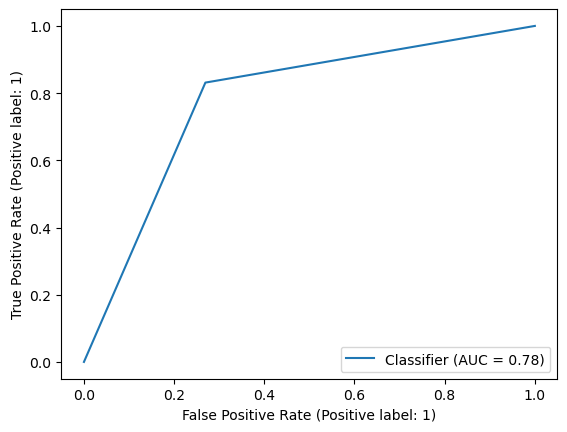

In [62]:
log2_auc = metrics.roc_auc_score(y_test,y_pred)

print("AUC Score: " + str(log2_auc))

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

This ROC curve shows a dramatic improvement in comparison to the curve for the previous logistic regression model. In this case, the rate of true positive is much higher which forces the bend in the curve close to the top-left of the graph. As mentioned previously, this is ideal since the lower the false positive rate and the higher the true positive rate, the closer the bend in the curve is to the top-left of the graph.

Furthermore, there is an increase in the AUC score from 0.60 in the previous model to 0.78. So according to this, at least 78% of the points classified by this model are correct.

**Summary**

Overall, when looking at the metrics, the confusion matrix, the ROC curve and AUC score. The inclusion of more independent variables has led to a general improvement in the model's ability to classify unprofitable and profitable movies. However, there is still an issue in the prediction of unprofitable movies where movies predicted to be unprofitable are actually profitable.

To try and improve this, I'm going to move on to using a decision tree instead of a logistic regression model.

# **Decision Tree**

From here, a decision tree will be used to try and handle the classification task. There are various positives for using a Decision Tress for a classification task like this. It takes less data preparation, and may handle outliers better in comparison to regression models. As exemplified in the box-plots during the EDA phase, there are outliers within the dataset that may be negatively impacting the previous models.

Furthermore, decision trees handle collinearity between variables well in comparison to regression models. As shown in the correlation heatmap, there are strong correlation between popularity-vote_count, profit-vote_count, and popularity-vote_count which may also be negatively impacting the previous models.

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [64]:
df_dectree = movies_df2[['popularity','runtime','vote_average','vote_count','profitability', 'Month_of_Release', 'Year_of_Release', 'budget']]
df_dectree = df_dectree.dropna()

Hyperparameter tuning was already done. It's not shown in the current code for the decision tree model because of the length of time it takes to run the decision tree. Instead, I just picked the best values for hyperparameter tuning after having run the program, and then hard coded it into the model.

The values used for hyperparameter tuning were as follows:

**'max_depth'**:[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],

**'min_samples_leaf'**: [2,3,4,5,6,7,8,9, 10, 15, 20, 50],

**'min_samples_split'**: [2,3,4,5,6,7,8,9, 10, 15, 20, 50]

In [86]:
y = df_dectree['profitability']
x = df_dectree.drop('profitability', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

tree = DecisionTreeClassifier(random_state=0)
cv_params = {
    'max_depth':[4],
    'min_samples_leaf':[50],
    'min_samples_split':[2]
}

scoring = {'accuracy','precision','recall','f1','roc_auc'}

tree1 = GridSearchCV(tree, cv_params, scoring='roc_auc', cv=4, refit='roc_auc')
tree1.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4], 'min_samples_leaf': [50],
                         'min_samples_split': [2]},
             refit='roc_auc', scoring='roc_auc')

In [87]:
print(tree1.best_params_)
print(tree1.best_score_)
print(tree1.best_estimator_)

{'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 2}
0.8697930593993756
DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=0)


[Text(0.4791666666666667, 0.9, 'vote_count <= 208.5\ngini = 0.497\nsamples = 3600\nvalue = [1939, 1661]'),
 Text(0.2708333333333333, 0.7, 'budget <= 3.5\ngini = 0.355\nsamples = 1715\nvalue = [395, 1320]'),
 Text(0.16666666666666666, 0.5, 'vote_count <= 80.5\ngini = 0.17\nsamples = 693\nvalue = [65, 628]'),
 Text(0.08333333333333333, 0.3, 'vote_count <= 27.5\ngini = 0.126\nsamples = 577\nvalue = [39, 538]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.087\nsamples = 395\nvalue = [18, 377]'),
 Text(0.125, 0.1, 'gini = 0.204\nsamples = 182\nvalue = [21, 161]'),
 Text(0.25, 0.3, 'vote_average <= 6.35\ngini = 0.348\nsamples = 116\nvalue = [26, 90]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.285\nsamples = 64\nvalue = [11, 53]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.411\nsamples = 52\nvalue = [15, 37]'),
 Text(0.375, 0.5, 'Year_of_Release <= 1977.5\ngini = 0.437\nsamples = 1022\nvalue = [330, 692]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.33\nsamples = 72\nvalue = [57, 15]'),
 Text(0.

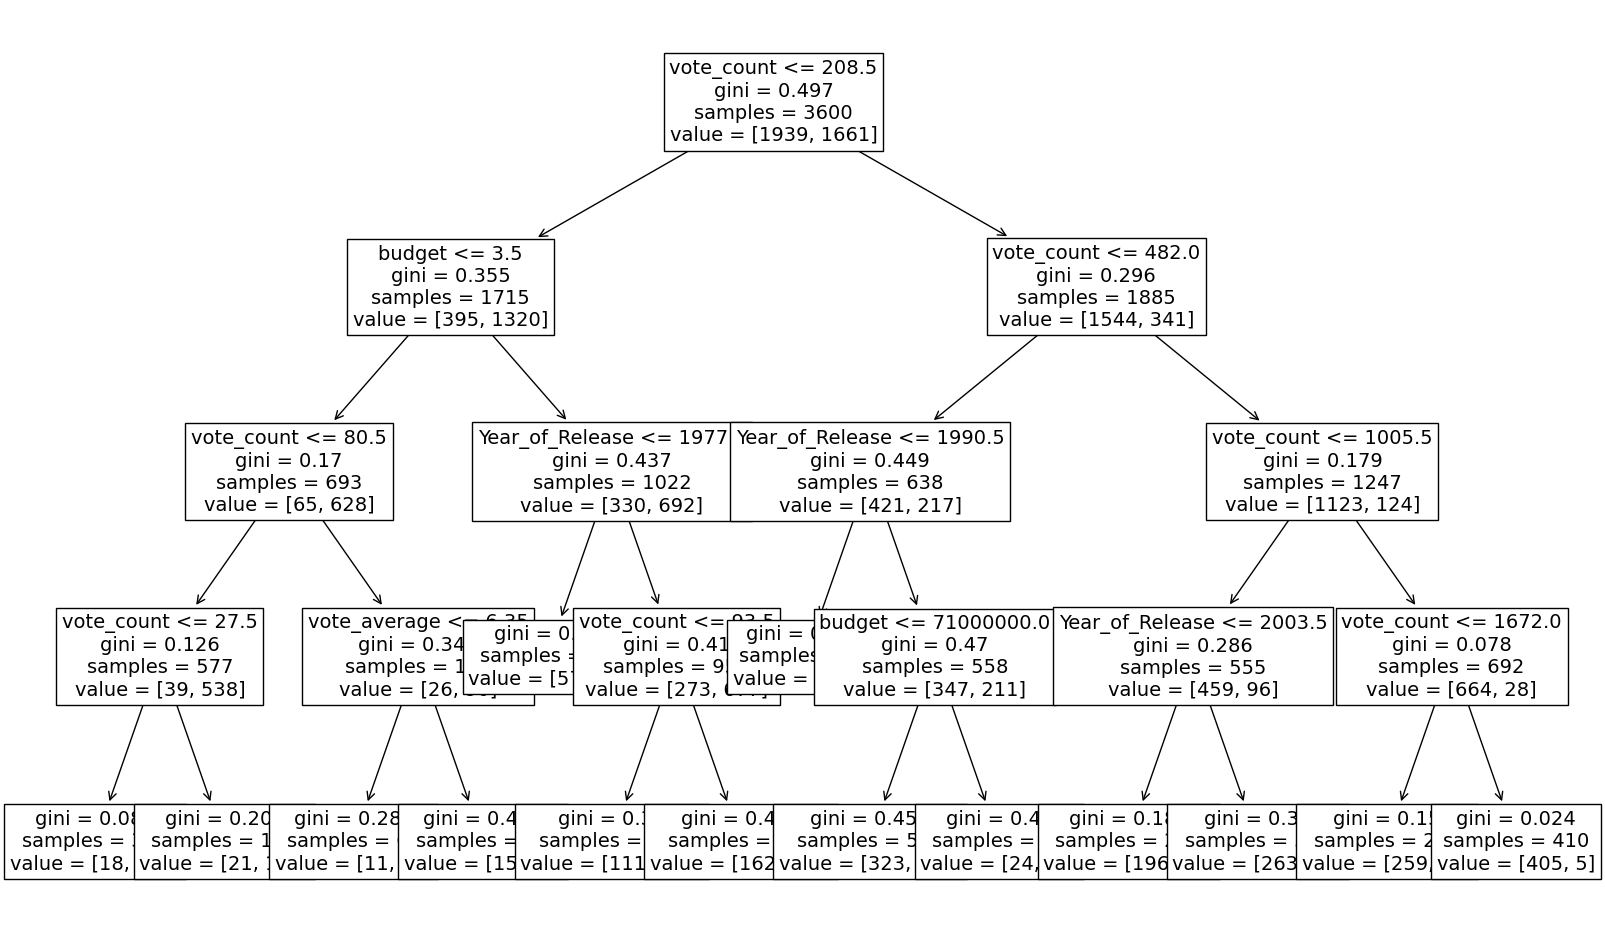

In [89]:
plt.figure(figsize=(20,12))
plot_tree(tree1.best_estimator_, max_depth=4, fontsize=14, feature_names=x.columns.tolist())

<Axes: >

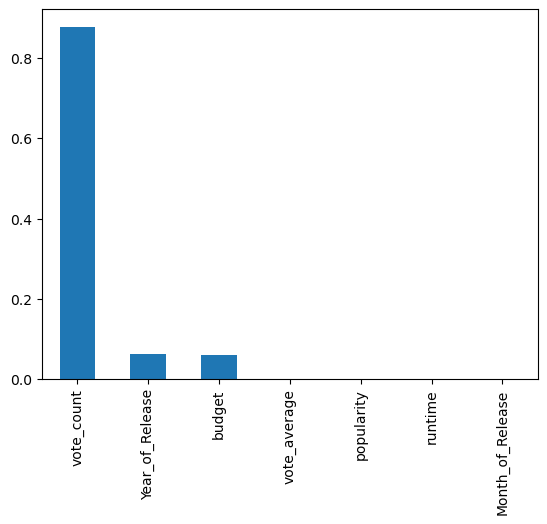

In [90]:
importances = tree1.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=x.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

The graph above is a feature importance graph. This helps showcase which features are the most important in the model. In this case "vote_count", "Year_of_Release", and "Budget" are the most important in the model with "vote_count" being the most important feature by far.

These features, especially "vote_count", are highly tied to whether or not a movie is profitable or unprofitable.

In [91]:
dt_pred = tree1.predict(x_test)

In [92]:
decTree_acc = metrics.accuracy_score(y_test, dt_pred)
decTree_prec = metrics.precision_score(y_test, dt_pred)
decTree_recall = metrics.recall_score(y_test, dt_pred)
decTree_f1 = metrics.f1_score(y_test, dt_pred)

print("Decision Tree")
print("Accuracy:", "%.6f" % decTree_acc)
print("Precision:", "%.6f" % decTree_prec)
print("Recall:", "%.6f" % decTree_recall)
print("F1 Score:", "%.6f" % decTree_f1)

Decision Tree
Accuracy: 0.794167
Precision: 0.782689
Recall: 0.767148
F1 Score: 0.774840


From the Decision Tree and onwards I am going to leave the evaluation of the metrics until the end. This will allow me to compare all of the metrics between each of the models.

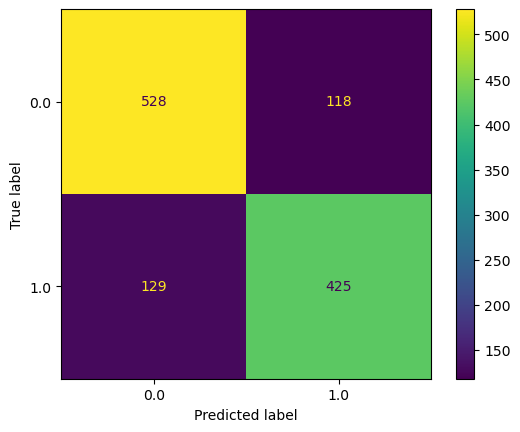

In [93]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = tree1.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree1.classes_)
disp.plot()

Looking at this confusion matrix, there does seem to be an improvement in the model's performance in comparison to the previous Logistic Regression models.

AUC Score: 0.7922427378703715


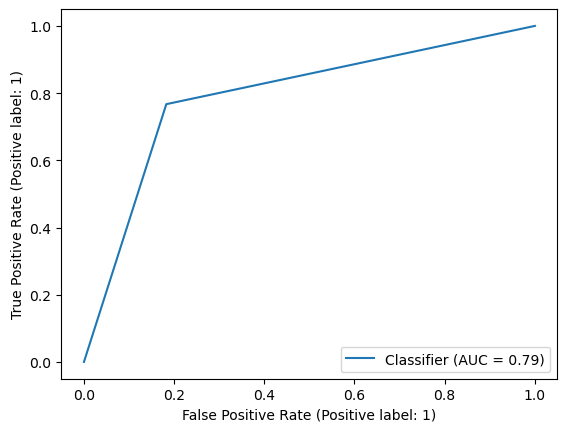

In [94]:
decTree_auc = metrics.roc_auc_score(y_test,dt_pred)
print("AUC Score: " + str(decTree_auc))

RocCurveDisplay.from_predictions(y_test, dt_pred)
plt.show()

This ROC curve shows a reduction in the false positive rate compared to the previous logistic regression model to below 0.2. There is also a slight decrease in the True Positive rate, but that could be attributed to differences in the testing data generated for this decision tree model compared to the previous models. Furthermore, the AUC score has also increased slightly from 0.78 to 0.79.

Overall, the most important takeaway with this decision tree model was the reduction in the incorrect predictions for unprofitable movies. Improving the classification of profitable and unprofitable movies over the previous models.

# **Random Forest Classifier**

Here instead of a single decision tree, an ensemble of decision trees are created and trained on randomized data and features. The main goal of this section is to try and see if different models can improve the classification of profitable and unprofitable movies, another goal is to give me some practice on implementing a Random Forest.

In [73]:
df_RandFor = movies_df2[['popularity','runtime','vote_average','vote_count','profitability', 'Month_of_Release', 'Year_of_Release', 'budget']]
df_RandFor = df_RandFor.dropna()

In [74]:
from sklearn.ensemble import RandomForestClassifier
y = df_RandFor['profitability']
x = df_RandFor.drop('profitability', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

rf = RandomForestClassifier(random_state = 0)
cv_params = {
    'n_estimators': [50, 100, 500],
    'max_depth':[10,50],
    'min_samples_leaf':[0.5,1],
    'min_samples_split':[0.001,0.01],
    'max_features': ["sqrt"],
    'max_samples': [0.5,0.9]
}
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf2 = GridSearchCV(rf, cv_params, cv=4, refit='roc_auc')
rf2.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100, 500]},
             refit='roc_auc')

In [75]:
print(rf2.best_params_)
print(rf2.best_score_)
print(rf2.best_estimator_)

{'max_depth': 50, 'max_features': 'sqrt', 'max_samples': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 0.001, 'n_estimators': 100}
0.8097222222222223
RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       random_state=0)


In [76]:
rf_pred = rf2.best_estimator_.predict(x_test)

In [77]:
RandFor_acc = metrics.accuracy_score(y_test, rf_pred)
RandFor_prec = metrics.precision_score(y_test, rf_pred)
RandFor_recall = metrics.recall_score(y_test, rf_pred)
RandFor_f1 = metrics.f1_score(y_test, rf_pred)

print("Random Forest")
print("Accuracy:", "%.6f" % RandFor_acc)
print("Precision:", "%.6f" % RandFor_prec)
print("Recall:", "%.6f" % RandFor_recall)
print("F1 Score:", "%.6f" % RandFor_f1)

Random Forest
Accuracy: 0.803333
Precision: 0.791209
Recall: 0.779783
F1 Score: 0.785455


Metrics for the random forest will be examined in detail and compared to the other metrics at the end of this project.

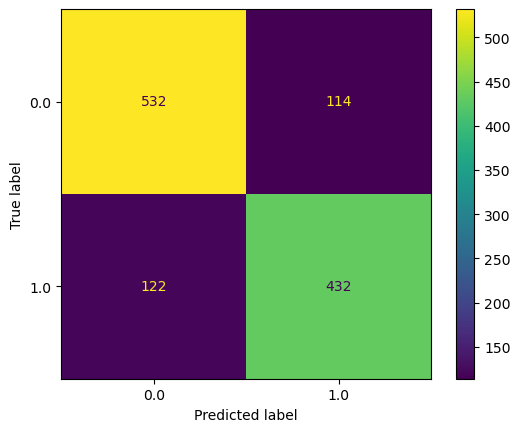

In [78]:
cm = metrics.confusion_matrix(y_test, rf_pred, labels=rf2.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)
disp.plot(values_format='');

Performance in regards to prediction are roughly similar to that of the decision tree.

<Axes: >

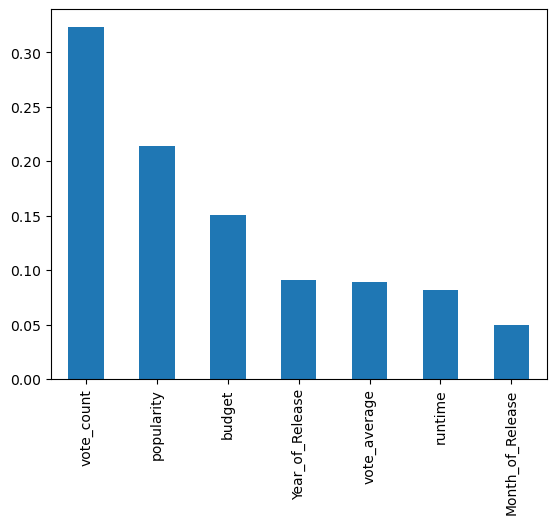

In [79]:
importances = rf2.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=x.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

Interestingly, for the random forest classifier, "Year_of_Release" is no longer one of the top three features and instead "popularity" is one of the top features. "Year_of_Release" is now fifth in terms of feature importance.

For the random forest classifier "vote_count", "popularity", and "budget" are the features highly tied to the classification of profitable and unprofitable movies.

AUC Score: 0.8016564026332554


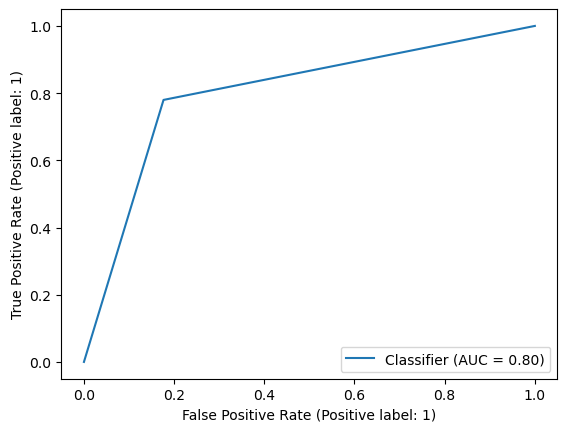

In [80]:
RandFor_auc = metrics.roc_auc_score(y_test,rf_pred)
print("AUC Score: " + str(RandFor_auc))

RocCurveDisplay.from_predictions(y_test, rf_pred)
plt.show()

The ROC curve and AUC score have values close to that of the decision tree so the classification of True Positives and False Positives are roughly similar in performance to the decision tree.

# **XGBoost**

The main goal of this section is to try and see if different models can improve the classification of profitable and unprofitable movies, along with giving me some practice on implementing XGBoost.

In [83]:
#!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 186.2 kB/s eta 0:08:56
   ---------------------------------------- 0.1/99.8 MB 272.3 kB/s eta 0:06:07
   ---------------------------------------- 0.1/99.8 MB 374.1 kB/s eta 0:04:27
   ---------------------------------------- 0.2/99.8 MB 538.9 kB/s eta 0:03:05
   ---------------------------------------- 0.2/99.8 MB 686.8 kB/s eta 0:02:25
   ---------------------------------------- 0.4/99.8 MB 1.0 MB/s eta 0:01:36
   ----------------------------------------

DEPRECATION: tsfresh 0.18.0 has a non-standard dependency specifier matrixprofile>=1.1.10<2.0.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of tsfresh or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [95]:
df_XGB = movies_df2[['popularity','runtime','vote_average','vote_count','profitability', 'Month_of_Release', 'Year_of_Release', 'budget']]
df_XGB = df_RandFor.dropna()

In [96]:
from xgboost import XGBClassifier

y = df_XGB['profitability']
x = df_XGB.drop('profitability', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

xgb = XGBClassifier(objective='binary:logistic', random_state=0)

cv_params = {
    'max_depth': [4,6],
    'min_child_weight': [3,5],
    'learning_rate': [0.1,0.2,0.3],
    'n_estimators': [5,10,15],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(
    xgb,
    cv_params,
    scoring = 'roc_auc',
    cv = 5,
    refit = 'f1'
)

xgb_cv = xgb_cv.fit(x_train, y_train)
xgb_cv

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring='roc_auc')

In [97]:
xgb_pred = xgb_cv.predict(x_test)

In [98]:
XGB_acc = metrics.accuracy_score(y_test, xgb_pred)
XGB_prec = metrics.precision_score(y_test, xgb_pred)
XGB_recall = metrics.recall_score(y_test, xgb_pred)
XGB_f1 = metrics.f1_score(y_test, xgb_pred)

print("XGBoost")
print("Accuracy:", "%.6f" % XGB_acc)
print("Precision:", "%.6f" % XGB_prec)
print("Recall:", "%.6f" % XGB_recall)
print("F1 Score:", "%.6f" % XGB_f1)

XGBoost
Accuracy: 0.795833
Precision: 0.786642
Recall: 0.765343
F1 Score: 0.775846


Metrics for the XGBoost will be examined in detail and compared to the metrics for the other models at the end of this project.

<Axes: >

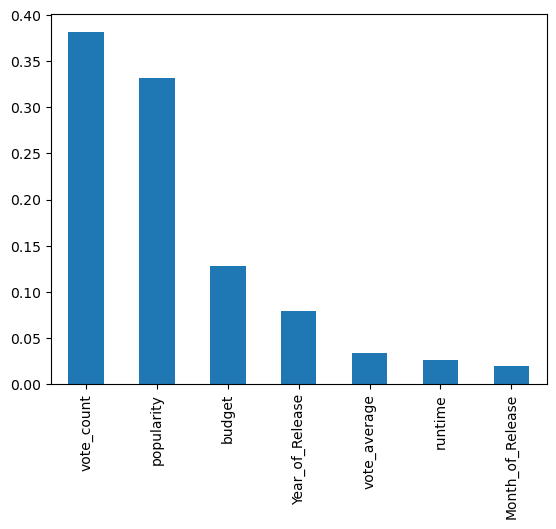

In [99]:
importances = xgb_cv.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=x.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

The feature importances doesn't seem to have changed from the random forest model, "vote_count", "popularity", and "budget" are still the top 3 features for classifying unprofitable or profitable movies in this XGBoost model.

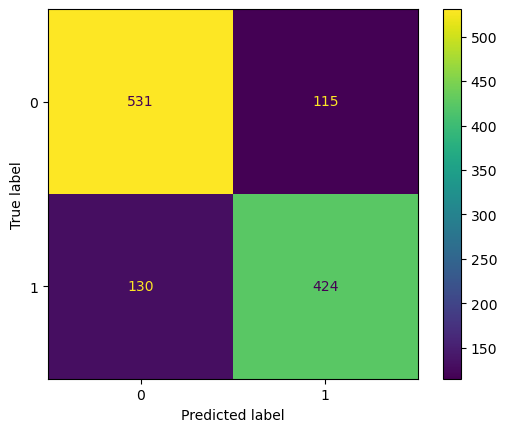

In [100]:
cm = metrics.confusion_matrix(y_test, xgb_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
disp.plot()

Performance in regards to prediction are roughly similar to that of both the decision tree and the Random Forest model.

AUC Score: 0.7936621922187076


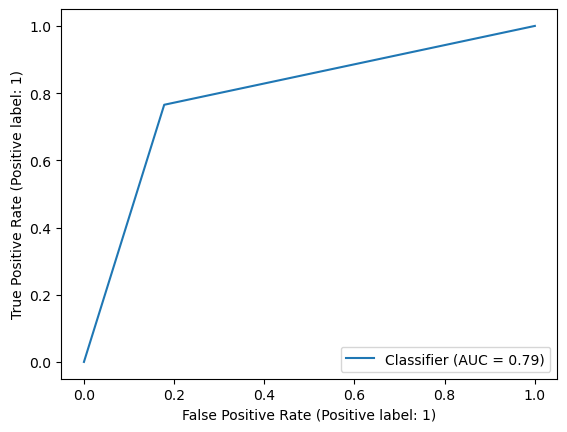

In [101]:
XGB_auc = metrics.roc_auc_score(y_test,xgb_pred)
print("AUC Score: " + str(XGB_auc))

RocCurveDisplay.from_predictions(y_test, xgb_pred)
plt.show()

The ROC curve and AUC score have values close to that of both the decision tree and the random forest model. Looking at this, the classification of True Positives and False Positives are roughly similar in performance to the decision tree.

# **Summary**

In [102]:
## Create a chart that compares all of the results from the different Models used
table = pd.DataFrame(
    {
    'Model': ["First Logistic Regression", "Second Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    'Accuracy':[log1_acc, log2_acc, decTree_acc, RandFor_acc, XGB_acc],
    'Precision':[log1_prec, log2_prec, decTree_prec, RandFor_prec, XGB_prec],
    'Recall':[log1_recall, log2_recall, decTree_recall, RandFor_recall, XGB_recall],
    'F1':[log1_f1, log2_f1, decTree_f1, RandFor_f1, XGB_f1],
    'AUC':[log1_auc, log2_auc, decTree_auc, RandFor_auc, XGB_auc]
    }
)

table

,Model,Accuracy,Precision,Recall,F1,AUC
0,First Logistic Regression,0.614488,0.614251,0.449640,0.519211,0.603115
1,Second Logistic Regression,0.777083,0.725361,0.831325,0.774737,0.780998
2,Decision Tree,0.794167,0.782689,0.767148,0.774840,0.792243
3,Random Forest,0.803333,0.791209,0.779783,0.785455,0.801656
4,XGBoost,0.795833,0.786642,0.765343,0.775846,0.793662


The chart above is a collection of all of the metrics for each of the models currently being used for the classification task between profitable and unprofitable movies. Looking at this, there seems to be a clear improvement between the First and Second Logistic Regression models where the first model only had "vote_average" as the independent variable used to try and predict profitability, and the second had 'popularity','runtime','vote_average','vote_count', 'Month_of_Release', and 'Year_of_Release' as independent variables used to classify profitable and unprofitable movies. Here, there is a clear advantage to using multiple independent variables that increases the accuracy, precision, and recall of a model for use in a classification task.

Afterwards though, when comparing the Second Logistic Regression model with the Decision Tree, Random Forest, and XGBoost, there is only slight incremental improvements to the model. 

Just to recap what each metric means: Accuracy measures the proportion of data points correctly categorized, Precision measures the proportion of positive predictions that were actually true positives, Recall measures the proportion of positives that the model correctly identified, and the F1 score combines both precision and recall into a single score.

In order to determine which model performed the best, we have to keep its purpose in mind: to classify which movies are profitable and unprofitable. In this case, one could argue that the best metrics to measure classification performance by is Accuracy and AUC. Firstly, accuracy measures the proportion of correctly categorized data points, therefore the accuracy score for these models show the proportion of correctly categorized profitable and unprofitable movies. Secondly, AUC measures a model's predictions on a scale of 0.0 to 1.0. On the scale, 0.0 means that a model's predictions are completely incorrect while a score of 1.0 means it is 100% correct. This is important to look at when classifying which movies are profitable and unprofitable, as a high AUC score points to a model capable of correctly classifying movies.

Looking at the chart above, it looks like the XGBoost Model performs the best since both its Accuracy and AUC scores are the highest amongst all of the other models with scores of 0.804 and 0.803 respectively.

When examining the XGBoost Model, we can take a look at the feature importances once again for more insight:

<Axes: >

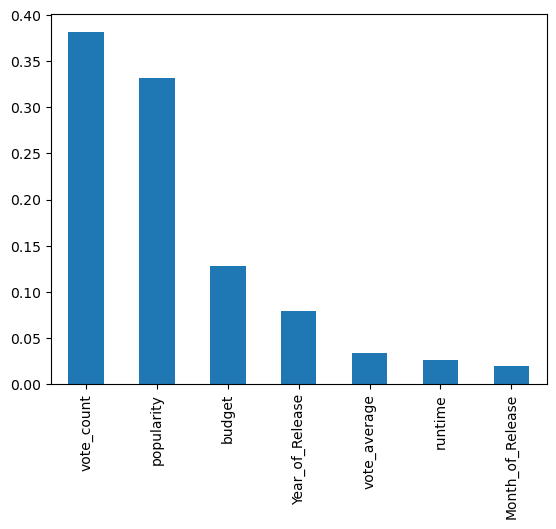

In [103]:
importances = xgb_cv.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=x.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

When looking at XGBoost's feature importances the top three most impactful features that effected the classification of profitable and unprofitable movies are "vote_count", "popularity", and "budget"; with "vote_count" being the feature that has the most impact.

Interestingly, both "vote_count" and "popularity" are metrics used to describe how well known a movie is amongst the general populace. In the case of "vote_count", it measures the number of votes a movie has, which is then used to compute its average rating. While "popularity" is an aggregate score based on several metrics like the number of votes per day, the number of views per day, total number of votes, etc..., according to the creator of the database.

Another interesting finding is that "vote_count" is a more important feature than "vote_average". Prior to this analysis, it would have been my guess that "vote_average" would be one of the most important features since the average rating of a movie is what generally decides whether or not I would want to watch a movie, or pay to see it in theatres. Instead, it's the number of votes that a movie has that was more important when classifying whether if it was profitable or not.

This is an important finding, and could be quite helpful when trying to determine what makes a movie profitable. For example, if someone was asking me to provide insight based on these models, a recommendation could be for studios to try to focus on advertising and promotional material to ensure a movie's popularity. The more people that are aware of the movie, the more people that are engaged with the movie and its promotional material through voting and reviews, through views, through "favoriting" it on online catalogues, or putting it on their "watchlists", the greater the chance the movie will turn out a profit.